<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2); line-height: 1.5;">
    <center style="color:white;font-size:35px;padding:15px"><b> ĐỒ ÁN CUỐI KỲ </b></center>
<center style="color:black;font-size:30px;padding:15px"><b> LẬP TRÌNH CHO KHOA HỌC DỮ LIỆU</b></center>
</div>


## Tiền xử lí + phân tích dữ liệu để trả lời câu hỏi

### Câu 1

### Câu 2


### Vẽ biểu đồ so sánh sự thay đổi về tuổi thọ kỳ vọng của 5 quốc gia có GDP bình quân đầu người cao nhất Châu Á trong 10 năm gần đây.

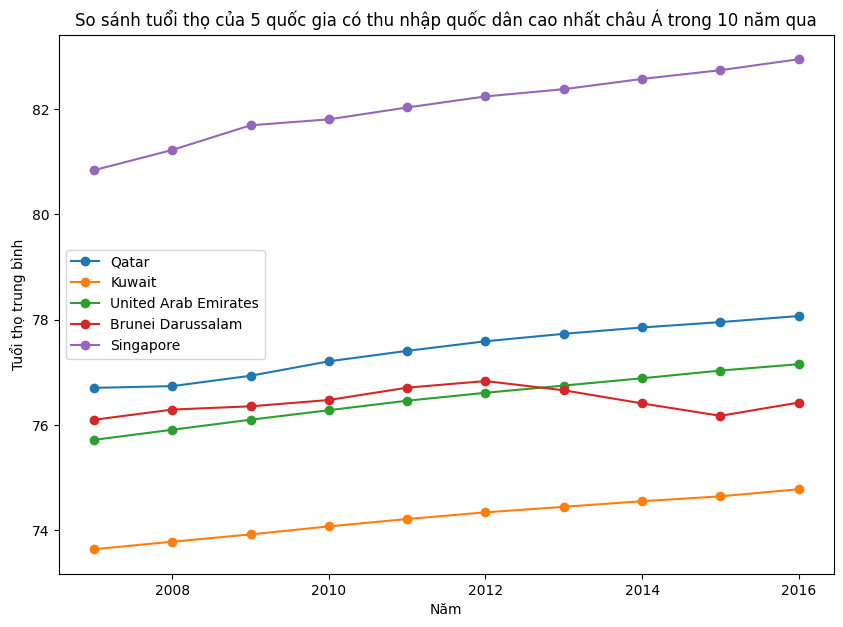

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ CSV
df = pd.read_csv('../Data/who_life_exp.csv')  

# Chọn các quốc gia có GDP bình quân đầu người cao nhất
top_countries = df.groupby('country')['gni_capita'].mean().nlargest(5).index

# Lọc dữ liệu cho 5 quốc gia này
filtered_df = df[df['country'].isin(top_countries)]

# Lọc theo 10 năm gần đây
recent_10_years = filtered_df[filtered_df['year'] >= df['year'].max() - 9]

# Vẽ biểu đồ so sánh
plt.figure(figsize=(10, 7))

for country in top_countries:
    country_data = recent_10_years[recent_10_years['country'] == country]
    plt.plot(country_data['year'], country_data['life_expect'], label=country, marker='o')

plt.xlabel('Năm')
plt.ylabel('Tuổi thọ trung bình')
plt.title('So sánh tuổi thọ của 5 quốc gia có thu nhập quốc dân cao nhất châu Á trong 10 năm qua')
plt.legend()
plt.show()


### Câu 3